# User Story 2
- User fills out the Blueprint with the PARAMS and executes several subfunctions of the experiment pipeline stepwise.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef and ElectricDevices.
- Sometimes the user is interested in visualizing the data before applying DCA. Some performance metrics are visualized

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
import sys

#sys.path.append(os.path.abspath("src"))
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from src.classifierWrapper import BakeoffClassifier
from src.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.apply_dca import apply_label_errors
from src.utils import load_and_expand_yaml, get_frames_and_names
from src.visualizations import visualize_acc_decr, visualize_trace_M


[2025-06-11 15:19:12] INFO - Custom-named logger active.
[2025-06-11 15:19:12] INFO - Custom-named logger active.


In [5]:
DATASET_NAME = "Beef"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                        #Random Seed for everything except the DCA
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1","p_vec":None, "random_seed":0,"start":0,"stop":90,"step":2} #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True                                           #Define if results should be saved

[2025-06-11 15:19:49] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0


X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
[2025-06-11 15:19:51] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-11 15:19:51] INFO - requested_instance_step = 0.6 will be transformed into 1
[2025-06-11 15:19:51] INFO - requested_percentage_step = 2 % || transformed into 3.3333 %
[2025-06-11 15:19:51] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-11 15:19:51] INFO - label_names: ['1' '2' '3' '4' '5']
[2025-06-11 15:19:51] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-11 15:19:51] INFO - The p_vector for the current_experiment: [0.2, 0.2, 0.2, 0.2, 0.2]
[2025-06-11 15:19:51] INFO - Searching inside simulation_results/MR-Hydra/Beef for results
[2025-06-11 15:19:51] INFO - Looking for files matching pattern: leV1_0_(\d+)_(\d+)_(\d+) with start=0, stop=29, step=1
[2025-06-11 15:19:51] INFO - 📁 Found directories: []


Cap reached
results are not present with the current experiment parameters
There is [1] no matching labelerror Version and [2] no matching randomSeed or [3] no experiment at all
error_perc_incr:  0.033333


Classifier: BakeoffClassifier


[2025-06-11 15:19:53] INFO - ------------------------Train time=0.93s, Eval Time=1.45s
[2025-06-11 15:19:53] INFO - current iteration: 0   current LE_step: 0 error_relative: 0
[2025-06-11 15:19:53] INFO - changed label 2 to 1 at index 11 of the data
[2025-06-11 15:19:53] INFO - current class balance distribution: {'1': 7, '2': 5, '3': 6, '4': 6, '5': 6}



Algorithm                         Accuracy
MR-Hydra                          0.7667
error_rel:  0
error_rel after increment:  0.033333


Classifier: BakeoffClassifier


[2025-06-11 15:19:56] INFO - ------------------------Train time=0.98s, Eval Time=1.58s
[2025-06-11 15:19:56] INFO - current iteration: 1   current LE_step: 1 error_relative: 0.033333
[2025-06-11 15:19:56] INFO - changed label 3 to 5 at index 15 of the data
[2025-06-11 15:19:56] INFO - current class balance distribution: {'1': 7, '2': 5, '3': 5, '4': 6, '5': 7}



Algorithm                         Accuracy
MR-Hydra                          0.7667
error_rel:  0.033333
error_rel after increment:  0.066666


Classifier: BakeoffClassifier


[2025-06-11 15:19:58] INFO - ------------------------Train time=0.96s, Eval Time=1.57s
[2025-06-11 15:19:58] INFO - current iteration: 2   current LE_step: 2 error_relative: 0.066666
[2025-06-11 15:19:58] INFO - changed label 1 to 3 at index 5 of the data
[2025-06-11 15:19:58] INFO - current class balance distribution: {'1': 6, '2': 5, '3': 6, '4': 6, '5': 7}



Algorithm                         Accuracy
MR-Hydra                          0.7333
error_rel:  0.066666
error_rel after increment:  0.099999


Classifier: BakeoffClassifier


[2025-06-11 15:20:01] INFO - ------------------------Train time=0.93s, Eval Time=1.63s
[2025-06-11 15:20:01] INFO - current iteration: 3   current LE_step: 3 error_relative: 0.099999
[2025-06-11 15:20:01] INFO - changed label 4 to 1 at index 22 of the data
[2025-06-11 15:20:01] INFO - current class balance distribution: {'1': 7, '2': 5, '3': 6, '4': 5, '5': 7}



Algorithm                         Accuracy
MR-Hydra                          0.7000
error_rel:  0.099999
error_rel after increment:  0.133332


Classifier: BakeoffClassifier


[2025-06-11 15:20:03] INFO - ------------------------Train time=0.92s, Eval Time=1.53s
[2025-06-11 15:20:03] INFO - current iteration: 4   current LE_step: 4 error_relative: 0.133332
[2025-06-11 15:20:03] INFO - changed label 3 to 5 at index 12 of the data
[2025-06-11 15:20:03] INFO - current class balance distribution: {'1': 7, '2': 5, '3': 5, '4': 5, '5': 8}



Algorithm                         Accuracy
MR-Hydra                          0.6667
error_rel:  0.133332
error_rel after increment:  0.166665


Classifier: BakeoffClassifier


[2025-06-11 15:20:06] INFO - ------------------------Train time=0.91s, Eval Time=1.54s
[2025-06-11 15:20:06] INFO - current iteration: 5   current LE_step: 5 error_relative: 0.166665
[2025-06-11 15:20:06] INFO - changed label 1 to 5 at index 4 of the data
[2025-06-11 15:20:06] INFO - current class balance distribution: {'1': 6, '2': 5, '3': 5, '4': 5, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.7000
error_rel:  0.166665
error_rel after increment:  0.199998


Classifier: BakeoffClassifier


[2025-06-11 15:20:08] INFO - ------------------------Train time=0.94s, Eval Time=1.53s
[2025-06-11 15:20:08] INFO - current iteration: 6   current LE_step: 6 error_relative: 0.199998
[2025-06-11 15:20:08] INFO - changed label 5 to 4 at index 27 of the data
[2025-06-11 15:20:08] INFO - current class balance distribution: {'1': 6, '2': 5, '3': 5, '4': 6, '5': 8}



Algorithm                         Accuracy
MR-Hydra                          0.7333
error_rel:  0.199998
error_rel after increment:  0.233331


Classifier: BakeoffClassifier


[2025-06-11 15:20:11] INFO - ------------------------Train time=0.94s, Eval Time=1.55s
[2025-06-11 15:20:11] INFO - current iteration: 7   current LE_step: 7 error_relative: 0.233331
[2025-06-11 15:20:11] INFO - changed label 3 to 5 at index 17 of the data
[2025-06-11 15:20:11] INFO - current class balance distribution: {'1': 6, '2': 5, '3': 4, '4': 6, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.7000
error_rel:  0.233331
error_rel after increment:  0.266664


Classifier: BakeoffClassifier


[2025-06-11 15:20:13] INFO - ------------------------Train time=0.98s, Eval Time=1.49s
[2025-06-11 15:20:13] INFO - current iteration: 8   current LE_step: 8 error_relative: 0.266664
[2025-06-11 15:20:13] INFO - changed label 1 to 3 at index 1 of the data
[2025-06-11 15:20:13] INFO - current class balance distribution: {'1': 5, '2': 5, '3': 5, '4': 6, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.6667
error_rel:  0.266664
error_rel after increment:  0.299997


Classifier: BakeoffClassifier


[2025-06-11 15:20:16] INFO - ------------------------Train time=0.93s, Eval Time=1.62s
[2025-06-11 15:20:16] INFO - current iteration: 9   current LE_step: 9 error_relative: 0.299997
[2025-06-11 15:20:16] INFO - changed label 2 to 5 at index 10 of the data
[2025-06-11 15:20:16] INFO - current class balance distribution: {'1': 5, '2': 4, '3': 5, '4': 6, '5': 10}



Algorithm                         Accuracy
MR-Hydra                          0.6000
error_rel:  0.299997
error_rel after increment:  0.33333


Classifier: BakeoffClassifier


[2025-06-11 15:20:18] INFO - ------------------------Train time=0.95s, Eval Time=1.59s
[2025-06-11 15:20:18] INFO - current iteration: 10   current LE_step: 10 error_relative: 0.33333
[2025-06-11 15:20:18] INFO - changed label 2 to 3 at index 7 of the data
[2025-06-11 15:20:18] INFO - current class balance distribution: {'1': 5, '2': 3, '3': 6, '4': 6, '5': 10}



Algorithm                         Accuracy
MR-Hydra                          0.6333
error_rel:  0.33333
error_rel after increment:  0.366663


Classifier: BakeoffClassifier


[2025-06-11 15:20:21] INFO - ------------------------Train time=0.96s, Eval Time=1.57s
[2025-06-11 15:20:21] INFO - current iteration: 11   current LE_step: 11 error_relative: 0.366663
[2025-06-11 15:20:21] INFO - changed label 1 to 4 at index 2 of the data
[2025-06-11 15:20:21] INFO - current class balance distribution: {'1': 4, '2': 3, '3': 6, '4': 7, '5': 10}



Algorithm                         Accuracy
MR-Hydra                          0.5667
error_rel:  0.366663
error_rel after increment:  0.399996


Classifier: BakeoffClassifier


[2025-06-11 15:20:23] INFO - ------------------------Train time=0.91s, Eval Time=1.61s
[2025-06-11 15:20:23] INFO - current iteration: 12   current LE_step: 12 error_relative: 0.399996
[2025-06-11 15:20:23] INFO - changed label 3 to 1 at index 13 of the data
[2025-06-11 15:20:23] INFO - current class balance distribution: {'1': 5, '2': 3, '3': 5, '4': 7, '5': 10}



Algorithm                         Accuracy
MR-Hydra                          0.5000
error_rel:  0.399996
error_rel after increment:  0.433329


Classifier: BakeoffClassifier


[2025-06-11 15:20:26] INFO - ------------------------Train time=0.98s, Eval Time=1.54s
[2025-06-11 15:20:26] INFO - current iteration: 13   current LE_step: 13 error_relative: 0.433329
[2025-06-11 15:20:26] INFO - changed label 3 to 5 at index 16 of the data
[2025-06-11 15:20:26] INFO - current class balance distribution: {'1': 5, '2': 3, '3': 4, '4': 7, '5': 11}



Algorithm                         Accuracy
MR-Hydra                          0.5000
error_rel:  0.433329
error_rel after increment:  0.466662


Classifier: BakeoffClassifier


[2025-06-11 15:20:28] INFO - ------------------------Train time=0.93s, Eval Time=1.48s
[2025-06-11 15:20:28] INFO - current iteration: 14   current LE_step: 14 error_relative: 0.466662
[2025-06-11 15:20:28] WARNING - Class 3 is now empty and will be removed from le_params!
[2025-06-11 15:20:28] INFO - changed label 3 to 4 at index 14 of the data
[2025-06-11 15:20:28] INFO - current class balance distribution: {'1': 5, '2': 3, '3': 3, '4': 8, '5': 11}



Algorithm                         Accuracy
MR-Hydra                          0.4333
error_rel:  0.466662
error_rel after increment:  0.499995


Classifier: BakeoffClassifier


[2025-06-11 15:20:31] INFO - ------------------------Train time=0.92s, Eval Time=1.56s
[2025-06-11 15:20:31] INFO - current iteration: 15   current LE_step: 15 error_relative: 0.499995
[2025-06-11 15:20:31] INFO - changed label 1 to 2 at index 3 of the data
[2025-06-11 15:20:31] INFO - current class balance distribution: {'1': 4, '2': 4, '3': 3, '4': 8, '5': 11}



Algorithm                         Accuracy
MR-Hydra                          0.3667
error_rel:  0.499995
error_rel after increment:  0.533328


Classifier: BakeoffClassifier


[2025-06-11 15:20:33] INFO - ------------------------Train time=0.94s, Eval Time=1.51s
[2025-06-11 15:20:33] INFO - current iteration: 16   current LE_step: 16 error_relative: 0.533328
[2025-06-11 15:20:33] INFO - changed label 5 to 1 at index 26 of the data
[2025-06-11 15:20:33] INFO - current class balance distribution: {'1': 5, '2': 4, '3': 3, '4': 8, '5': 10}



Algorithm                         Accuracy
MR-Hydra                          0.3667
error_rel:  0.533328
error_rel after increment:  0.5666610000000001


Classifier: BakeoffClassifier


[2025-06-11 15:20:36] INFO - ------------------------Train time=0.91s, Eval Time=1.60s
[2025-06-11 15:20:36] INFO - current iteration: 17   current LE_step: 17 error_relative: 0.566661
[2025-06-11 15:20:36] INFO - changed label 4 to 1 at index 18 of the data
[2025-06-11 15:20:36] INFO - current class balance distribution: {'1': 6, '2': 4, '3': 3, '4': 7, '5': 10}



Algorithm                         Accuracy
MR-Hydra                          0.3333
error_rel:  0.566661
error_rel after increment:  0.5999939999999999


Classifier: BakeoffClassifier


[2025-06-11 15:20:38] INFO - ------------------------Train time=0.91s, Eval Time=1.54s
[2025-06-11 15:20:38] INFO - current iteration: 18   current LE_step: 18 error_relative: 0.599994
[2025-06-11 15:20:38] INFO - changed label 4 to 3 at index 20 of the data
[2025-06-11 15:20:38] INFO - current class balance distribution: {'1': 6, '2': 4, '3': 4, '4': 6, '5': 10}



Algorithm                         Accuracy
MR-Hydra                          0.3333
error_rel:  0.599994
error_rel after increment:  0.633327


Classifier: BakeoffClassifier


[2025-06-11 15:20:41] INFO - ------------------------Train time=0.88s, Eval Time=1.44s
[2025-06-11 15:20:41] INFO - current iteration: 19   current LE_step: 19 error_relative: 0.633327
[2025-06-11 15:20:41] INFO - changed label 5 to 2 at index 28 of the data
[2025-06-11 15:20:41] INFO - current class balance distribution: {'1': 6, '2': 5, '3': 4, '4': 6, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.2667
error_rel:  0.633327
error_rel after increment:  0.66666


Classifier: BakeoffClassifier


[2025-06-11 15:20:43] INFO - ------------------------Train time=0.93s, Eval Time=1.45s
[2025-06-11 15:20:43] INFO - current iteration: 20   current LE_step: 20 error_relative: 0.66666
[2025-06-11 15:20:43] INFO - changed label 5 to 3 at index 24 of the data
[2025-06-11 15:20:43] INFO - current class balance distribution: {'1': 6, '2': 5, '3': 5, '4': 6, '5': 8}



Algorithm                         Accuracy
MR-Hydra                          0.2667
error_rel:  0.66666
error_rel after increment:  0.6999930000000001


Classifier: BakeoffClassifier


[2025-06-11 15:20:45] INFO - ------------------------Train time=0.91s, Eval Time=1.46s
[2025-06-11 15:20:45] INFO - current iteration: 21   current LE_step: 21 error_relative: 0.699993
[2025-06-11 15:20:45] WARNING - Class 1 is now empty and will be removed from le_params!
[2025-06-11 15:20:45] INFO - changed label 1 to 5 at index 0 of the data
[2025-06-11 15:20:45] INFO - current class balance distribution: {'1': 5, '2': 5, '3': 5, '4': 6, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.2667
error_rel:  0.699993
error_rel after increment:  0.7333259999999999


Classifier: BakeoffClassifier


[2025-06-11 15:20:48] INFO - ------------------------Train time=0.92s, Eval Time=1.47s
[2025-06-11 15:20:48] INFO - current iteration: 22   current LE_step: 22 error_relative: 0.733326
[2025-06-11 15:20:48] INFO - changed label 4 to 5 at index 23 of the data
[2025-06-11 15:20:48] INFO - current class balance distribution: {'1': 5, '2': 5, '3': 5, '4': 5, '5': 10}



Algorithm                         Accuracy
MR-Hydra                          0.2667
error_rel:  0.733326
error_rel after increment:  0.766659


Classifier: BakeoffClassifier


[2025-06-11 15:20:50] INFO - ------------------------Train time=0.90s, Eval Time=1.44s
[2025-06-11 15:20:50] INFO - current iteration: 23   current LE_step: 23 error_relative: 0.766659
[2025-06-11 15:20:50] INFO - changed label 5 to 3 at index 29 of the data
[2025-06-11 15:20:50] INFO - current class balance distribution: {'1': 5, '2': 5, '3': 6, '4': 5, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.2333
error_rel:  0.766659
error_rel after increment:  0.799992


Classifier: BakeoffClassifier


[2025-06-11 15:20:53] INFO - ------------------------Train time=0.90s, Eval Time=1.52s
[2025-06-11 15:20:53] INFO - current iteration: 24   current LE_step: 24 error_relative: 0.799992
[2025-06-11 15:20:53] INFO - changed label 2 to 1 at index 6 of the data
[2025-06-11 15:20:53] INFO - current class balance distribution: {'1': 6, '2': 4, '3': 6, '4': 5, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.2333
error_rel:  0.799992
error_rel after increment:  0.8333250000000001


Classifier: BakeoffClassifier


[2025-06-11 15:20:55] INFO - ------------------------Train time=0.91s, Eval Time=1.49s
[2025-06-11 15:20:55] INFO - current iteration: 25   current LE_step: 25 error_relative: 0.833325
[2025-06-11 15:20:55] INFO - changed label 2 to 3 at index 9 of the data
[2025-06-11 15:20:55] INFO - current class balance distribution: {'1': 6, '2': 3, '3': 7, '4': 5, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.1667
error_rel:  0.833325
error_rel after increment:  0.8666579999999999


Classifier: BakeoffClassifier


[2025-06-11 15:20:58] INFO - ------------------------Train time=0.91s, Eval Time=1.54s
[2025-06-11 15:20:58] INFO - current iteration: 26   current LE_step: 26 error_relative: 0.866658
[2025-06-11 15:20:58] WARNING - Class 2 is now empty and will be removed from le_params!
[2025-06-11 15:20:58] INFO - changed label 2 to 3 at index 8 of the data
[2025-06-11 15:20:58] INFO - current class balance distribution: {'1': 6, '2': 2, '3': 8, '4': 5, '5': 9}



Algorithm                         Accuracy
MR-Hydra                          0.1667
error_rel:  0.866658
error_rel after increment:  0.899991


Classifier: BakeoffClassifier


[2025-06-11 15:21:00] INFO - ------------------------Train time=0.89s, Eval Time=1.48s
[2025-06-11 15:21:00] INFO - current iteration: 27   current LE_step: 27 error_relative: 0.899991
[2025-06-11 15:21:00] WARNING - Class 5 is now empty and will be removed from le_params!
[2025-06-11 15:21:00] INFO - changed label 5 to 2 at index 25 of the data
[2025-06-11 15:21:00] INFO - current class balance distribution: {'1': 6, '2': 3, '3': 8, '4': 5, '5': 8}



Algorithm                         Accuracy
MR-Hydra                          0.2000
error_rel:  0.899991
error_rel after increment:  0.933324


Classifier: BakeoffClassifier


[2025-06-11 15:21:02] INFO - ------------------------Train time=0.92s, Eval Time=1.50s
[2025-06-11 15:21:02] INFO - current iteration: 28   current LE_step: 28 error_relative: 0.933324
[2025-06-11 15:21:02] INFO - changed label 4 to 2 at index 21 of the data
[2025-06-11 15:21:02] INFO - current class balance distribution: {'1': 6, '2': 4, '3': 8, '4': 4, '5': 8}



Algorithm                         Accuracy
MR-Hydra                          0.0667
error_rel:  0.933324
error_rel after increment:  0.9666570000000001


Classifier: BakeoffClassifier


[2025-06-11 15:21:05] INFO - ------------------------Train time=0.94s, Eval Time=1.46s
[2025-06-11 15:21:05] INFO - current iteration: 29   current LE_step: 29 error_relative: 0.966657



Algorithm                         Accuracy
MR-Hydra                          0.0333
✅ Results saved in: simulation_results/MR-Hydra/Beef/leV1_0_0_29_1


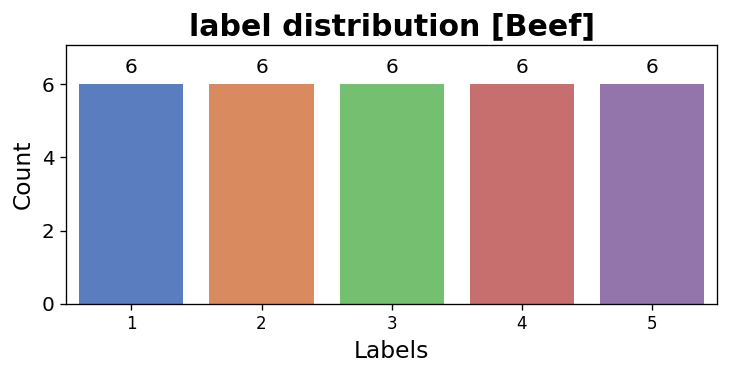

In [6]:
# Classifier MR-Hydra, Dataset Beef 100%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = BakeoffClassifier(name= CLASSIFIER_NAME, random_state=RANDOM_S)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_, trace_M_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, doe_param=DoE_PARAM)

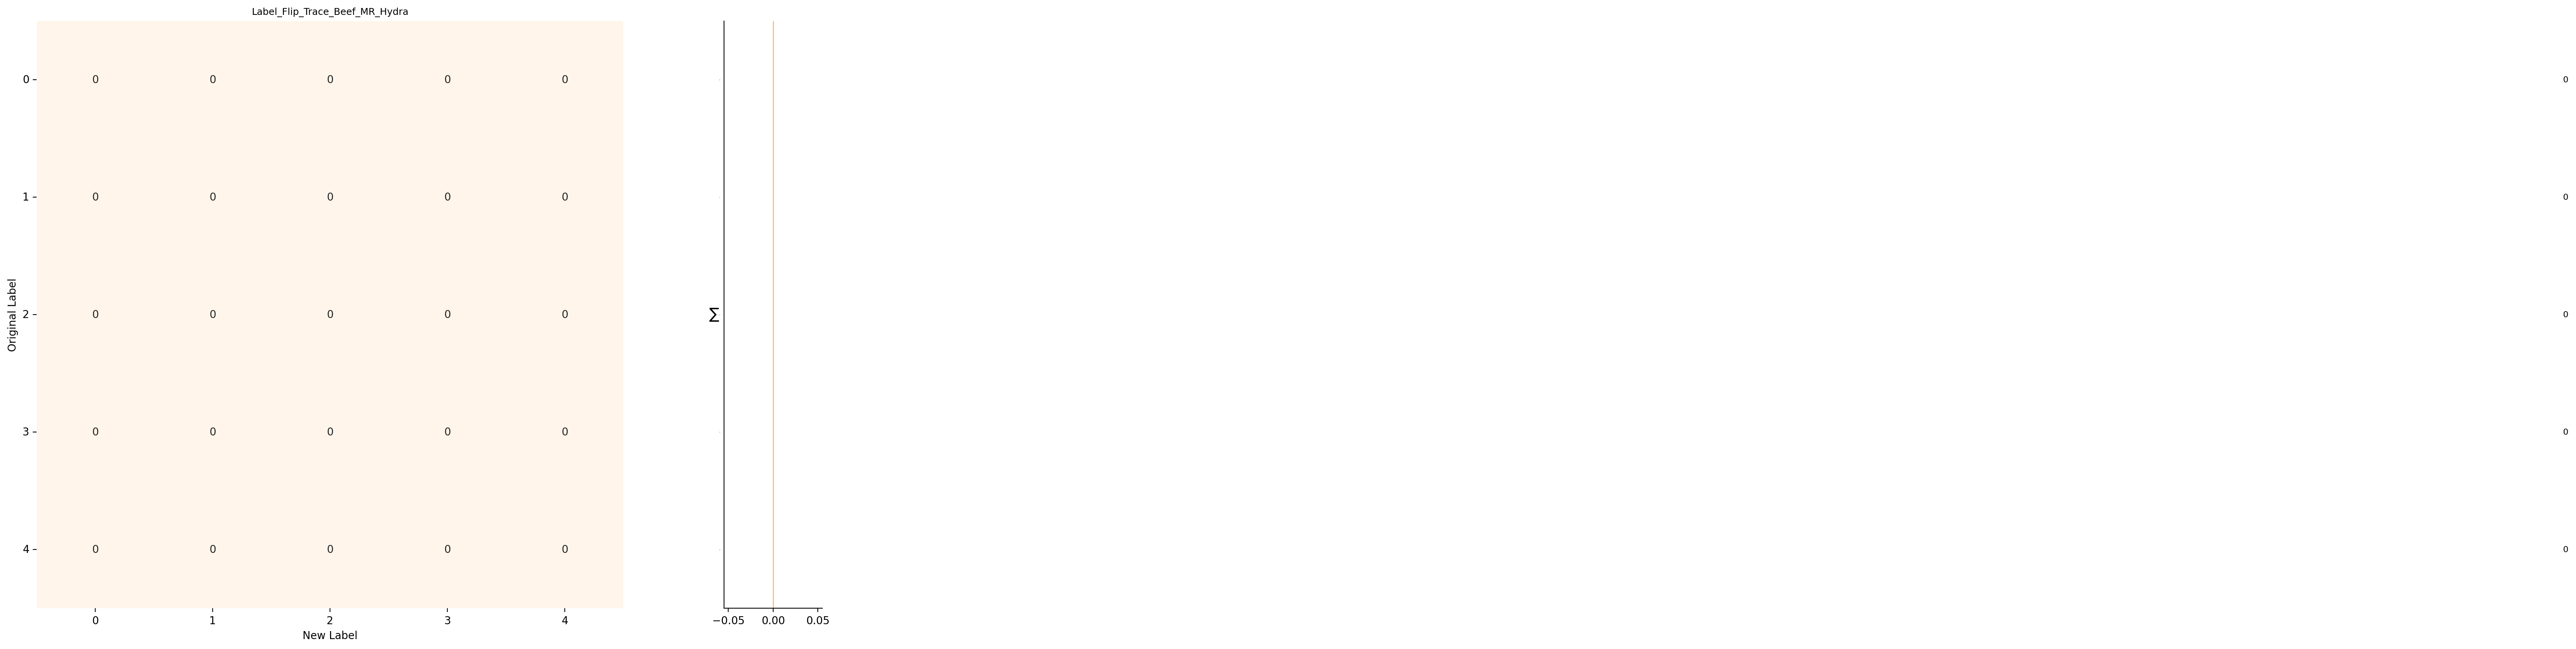

In [7]:
visualize_trace_M(trace_M_, cl_="MR_Hydra", ds_="Beef", figsize=(20 ,10))

In [8]:
df_

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
0,0,0,0.000000,0.766667,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
1,1,1,0.033333,0.766667,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
2,2,2,0.066666,0.733333,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 5, 2, 1, 2, 1, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
3,3,3,0.099999,0.700000,"[1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, ...","[4, 1, 1, 1, 1, 3, 2, 5, 2, 1, 2, 1, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
4,4,4,0.133332,0.666667,"[1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, ...","[4, 1, 1, 1, 1, 3, 2, 5, 2, 1, 2, 1, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
5,5,5,0.166665,0.700000,"[1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 5, 3, 3, ...","[4, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
6,6,6,0.199998,0.733333,"[1, 1, 1, 1, 5, 3, 2, 2, 2, 2, 2, 1, 5, 3, 3, ...","[4, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
7,7,7,0.233331,0.700000,"[1, 1, 1, 1, 5, 3, 2, 2, 2, 2, 2, 1, 5, 3, 3, ...","[4, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
8,8,8,0.266664,0.666667,"[1, 1, 1, 1, 5, 3, 2, 2, 2, 2, 2, 1, 5, 3, 3, ...","[4, 1, 1, 1, 1, 3, 2, 5, 2, 1, 2, 5, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
9,9,9,0.299997,0.600000,"[1, 3, 1, 1, 5, 3, 2, 2, 2, 2, 2, 1, 5, 3, 3, ...","[4, 3, 1, 1, 3, 3, 2, 5, 2, 1, 2, 5, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0...."


In [10]:
DATASET_NAME = "ElectricDevices"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"                       #should be in cl_ names
REDUCTION_F = 10                                   #optional. only for large datasets
RANDOM_S = 0                        #Random Seed for everything except the DCA
DCA= "LabelErrors"                      
DoE_PARAM = {"le_strategy": "leV1", "p_vec":None, "random_seed":1,"start":0,"stop":60,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                              #respect folder structure
SAVE_FILES = True 

[2025-06-02 10:13:16] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-06-02 10:13:16] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-02 10:13:16] INFO - requested_instance_step = 44.6 will be transformed into 45
[2025-06-02 10:13:16] INFO - requested_percentage_step = 500 % || transformed into 5.0448 %
[2025-06-02 10:13:16] INFO - label_names: ['1' '2' '3' '4' '5' '6' '7']
[2025-06-02 10:13:16] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-02 10:13:16] INFO - The p_vector for the current_experiment: [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429]
[2025-06-02 10:13:16] INFO - Searching inside simulation_results/MR-Hydra/ElectricDevices for results
[2025-06-02 10:13:16] INFO - Looking for files matching pattern: leV1_1_(\d+)_(\d+)_(\d+) with start=0, stop=540, step=45
[2025-06-02 10:13:16] INFO - 📁 Found directories: ['leV1_2_0_144_9', 'leV1_1_0_810_45', 'leV1_0_0_810_45', 'leV1_2_0_54_18', '

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)


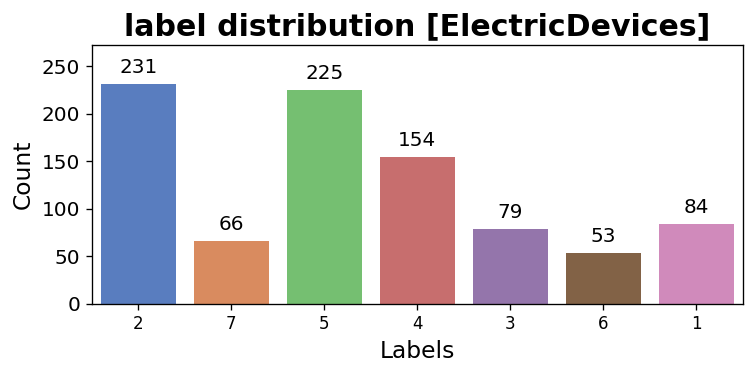

In [11]:
# Classifier MR-Hydra, Dataset ED 10%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = BakeoffClassifier(name=CLASSIFIER_NAME, random_state=RANDOM_S)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_,  trace_m_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, doe_param=DoE_PARAM)

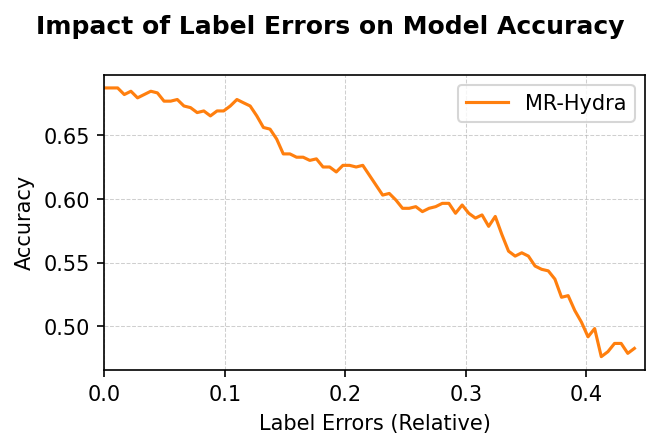

In [6]:
visualize_acc_decr(df_acc_inst_rel=df_, dpi_=150, first="relative", second=None, w_=4.5, h_=3, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, save_fig=True)

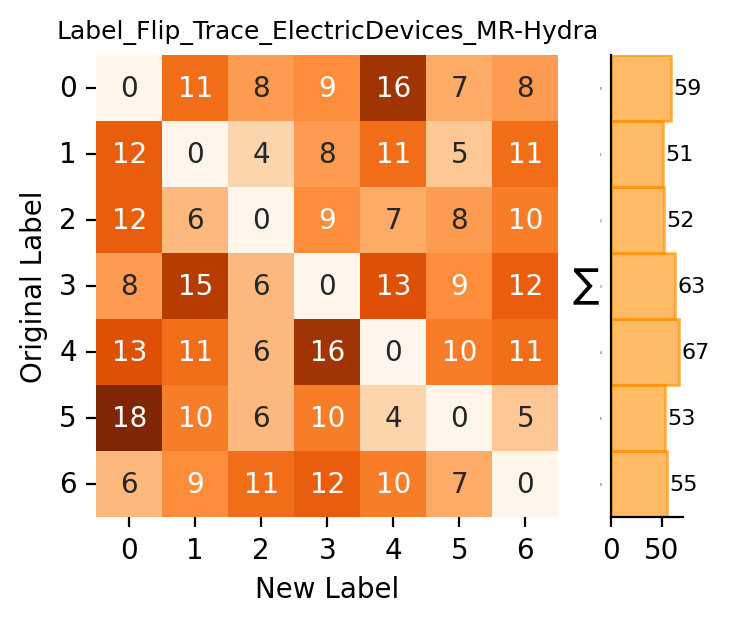

In [7]:
visualize_trace_M(trace_M=trace_m_, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, dpi=200, filename_="trace_M", save_fig=True)

In [ ]:
DATASET_NAME = "ElectricDevices"        #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 10                        #optional. only for large datasets
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1","random_seed":1,"start":0,"stop":550,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True  


current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
